In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [9]:
X,Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


NameError: name 'dlc' is not defined

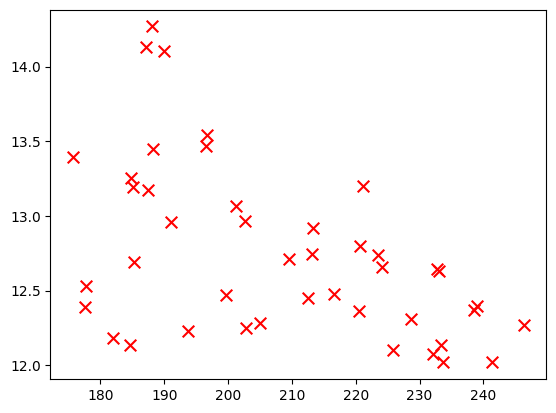

In [10]:
plt_roast(X,Y)

In [15]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)
print(Xn.shape)

(200, 2)


In [13]:
Xt = np.tile(Xn,(1000,1))
Yt = np.tile(Y,(1000,1))
print(Xt.shape,Yt.shape)

(200000, 2) (200000, 1)


In [16]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
    ])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
L1_num_params = 2 * 3 + 3
L2_num_params = 3 * 1 + 1

In [19]:
W1,b1 = model.get_layer("layer1").get_weights()
W2,b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.93142486  0.3367051   0.9686825 ]
 [-0.9508621   0.4778782   0.37760532]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.7297132 ]
 [-0.6893629 ]
 [ 0.60929036]] 
b2(1,): [0.]


In [20]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 213us/step - loss: 0.1873
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 215us/step - loss: 0.0442
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 208us/step - loss: 0.0232
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 210us/step - loss: 0.0162
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 207us/step - loss: 0.0126
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 209us/step - loss: 0.0102
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 210us/step - loss: 0.0085
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 213us/step - loss: 0.0071
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 210us/step - loss: 0.0061
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 212us/step - loss: 0.0053


In [21]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[14.264092   13.217167   -0.01528541]
 [ 0.29260963 11.025689   11.279569  ]] 
b1: [14.949553   1.3781383 13.637704 ]
W2:
 [[ 28.627579]
 [-38.44288 ]
 [ 28.330317]] 
b2: [-37.16847]


In [22]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

# Replace the weights from your trained model with
# the values above.
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

In [23]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-8.94  0.29 12.89]
 [-0.17 -7.34 10.79]] 
b1: [-9.87 -9.28  1.01]
W2:
 [[-31.38]
 [-27.86]
 [-32.79]] 
b2: [15.54]


In [24]:
X_test = np.array([
    [200,13.9],  # positive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predictions = 
 [[9.625127e-01]
 [3.031606e-08]]


In [25]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [26]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


NameError: name 'dlc' is not defined

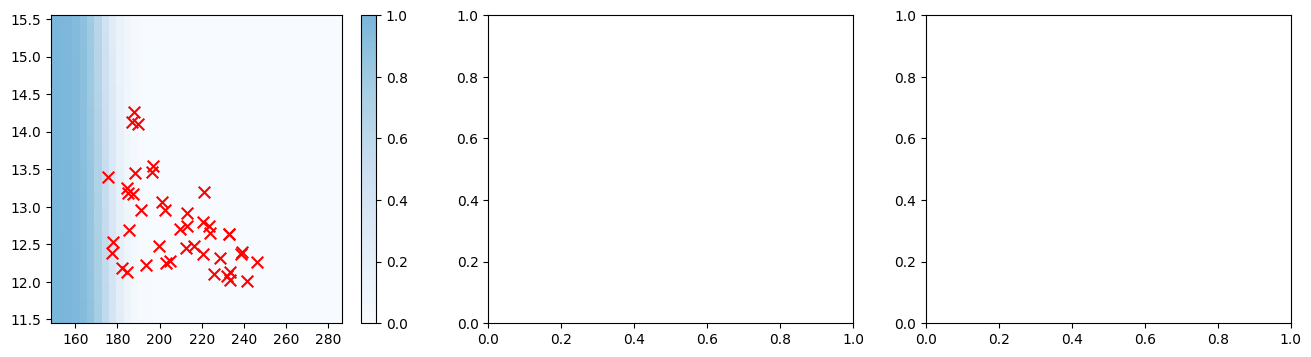

In [27]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

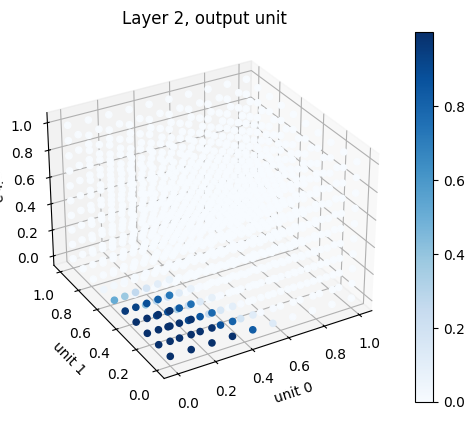

In [28]:
plt_output_unit(W2,b2)